# Rezolvarea unor probleme de regresie prin metode de învățare automată

In [21]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [22]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
            
    selected_variables_index = [dataNames.index(variable) for variable in inputVariabName]
    inputs = []
    for var in selected_variables_index:
        inputs.append([data[index][var] for index in range(len(data))])

    output_selected_index = dataNames.index(outputVariabName)
    outputs = [data[index][output_selected_index] for index in range(len(data))]

    return inputs, outputs

In [23]:
def linear_regression_tool(train_inputs, train_output, validation_inputs, validation_output):
    sklearn_data = [(float(e1), float(e2)) for e1, e2 in zip(train_inputs[0], train_inputs[1])]
    regressor = linear_model.LinearRegression()
    regressor.fit(sklearn_data, train_output)

    w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
    print('the learnt model (tool): f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

    arr = [[float(e1), float(e2)] for e1, e2 in zip(validation_inputs[0], validation_inputs[1])]

    computed_validation_output = regressor.predict(arr)

    from sklearn.metrics import mean_squared_error

    error = mean_squared_error(validation_output, computed_validation_output)
    print("Prediction error (tool): ", error)

In [24]:
def create_identity_matrix(n):
    """
    Create an identity matrix of size n x n.
    """
    identity_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        identity_matrix[i][i] = 1
    return identity_matrix

def transpose(matrix):
    """
    Transpose a matrix.
    """
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def multiply_matrices(matrix1, matrix2):
    """
    Multiply two matrices.
    """
    result = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

def inverse(matrix):
    """
    Calculate the inverse of a square matrix.
    """
    n = len(matrix)
    if n != len(matrix[0]):
        print("Matrix is not square. Inverse cannot be calculated.")
        return None

    # Augment the matrix with an identity matrix
    augmented_matrix = [row[:] + identity_row for row, identity_row in zip(matrix, create_identity_matrix(n))]

    # Apply Gauss-Jordan elimination
    for col in range(n):
        # Find the pivot
        for row in range(col, n):
            if augmented_matrix[row][col] != 0:
                break
        else:
            print("Matrix is singular. Inverse cannot be calculated.")
            return None

        # Swap rows to move the pivot to the diagonal
        augmented_matrix[col], augmented_matrix[row] = augmented_matrix[row], augmented_matrix[col]

        # Scale the pivot row to have a leading 1
        pivot = augmented_matrix[col][col]
        augmented_matrix[col] = [element / pivot for element in augmented_matrix[col]]

        # Eliminate non-zero values in the column
        for row in range(n):
            if row != col:
                factor = augmented_matrix[row][col]
                augmented_matrix[row] = [x - factor * y for x, y in zip(augmented_matrix[row], augmented_matrix[col])]

    # Extract the right part of the augmented matrix as the inverse
    inverse_matrix = [row[n:] for row in augmented_matrix]

    return inverse_matrix

In [25]:
def generateTrainingTest(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(outputs))]
    train_sample = np.random.choice(indexes, int(0.8 * len(outputs)), replace=False)
    validation_sample = [i for i in indexes if i not in train_sample]

    train_inputs = [[float(inputs[0][index]) for index in train_sample], [float(inputs[1][index]) for index in train_sample]]
    train_output = [float(outputs[index]) for index in train_sample]

    validation_inputs = [[float(inputs[0][index]) for index in validation_sample], [float(inputs[1][index]) for index in validation_sample]]
    validation_output = [float(outputs[index]) for index in validation_sample]

    return train_inputs, train_output, validation_inputs, validation_output

coeficient = (X^T * X) ^ -1 * X^T * Y

In [31]:
def linear_regression_manual(train_inputs, train_output, validation_inputs, validation_output):
    X_transpus = [[1] * len(train_inputs[0])] + train_inputs
    
    # M = X_transpus * X
    M = []
    for row1 in X_transpus:
        line = []
        for row2 in X_transpus:
            line.append(sum([x * y for x, y in zip(row1, row2)]))
        M.append(line)
    M_inverse = inverse(M)
    M_inverse_X_transpus = []
    for row in M_inverse:
        line = []
        for row1 in transpose(X_transpus):
            line.append(sum([x * y for x, y in zip(row, row1)]))
        M_inverse_X_transpus.append(line)
    M_inverse_X_transpus_Y = []
    for row in M_inverse_X_transpus:
        M_inverse_X_transpus_Y.append(sum([x * y for x, y in zip(row, train_output)]))

    w0, w1, w2 = M_inverse_X_transpus_Y[0], M_inverse_X_transpus_Y[1], M_inverse_X_transpus_Y[2]
    print('the learnt model (manual): f(x) = ', w0 , ' + ', w1, ' * x1 + ', w2, ' * x2')

    y = []
    for x1, x2 in zip(*validation_inputs):
        y.append(w0 + w1 * x1 + w2 * x2)
    
    error = 0.0
    for t1, t2 in zip(y, validation_output):
        error += (t1-t2) ** 2
    error = error / len(validation_output)
    print("Prediction error: ", error)

### Gradul de fericire in functie de Familie

the learnt model (tool): f(x) =  0.4719180650554877  +  3.2328954364819484  * x1
the learnt model (manual): f(x) =  -1.6931366420940717  +  4.666666666666667  * x1


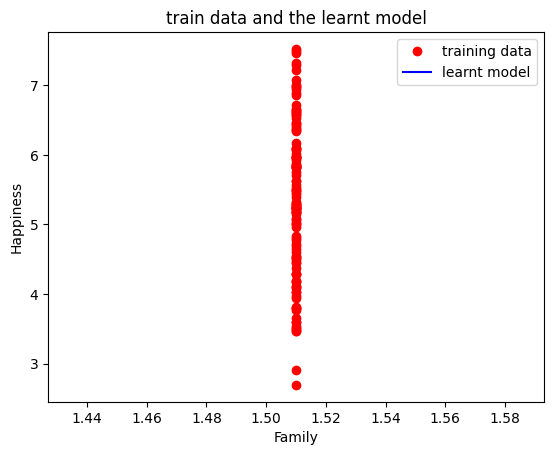

In [57]:
from myRegression import MyLinearUnivariateRegression

filePath1 = "data/v1_world-happiness-report-2017.csv"
filePath2 = "data/v2_world-happiness-report-2017.csv"
filePath3 = "data/v3_world-happiness-report-2017.csv"

inputs, outputs = loadData(filePath1, ['Family'], 'Happiness.Score')

np.random.seed(5)
indexes = [i for i in range(len(inputs[0]))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs[0])), replace=False)
validationSample = [i for i in indexes  if not i in trainSample]
trainInputs = [float(inputs[0][i]) for i in trainSample]
trainOutputs = [float(outputs[i]) for i in trainSample]
validationInputs = [float(inputs[0][i]) for i in validationSample]
validationOutputs = [float(outputs[i]) for i in validationSample]

xx = [[el] for el in trainInputs]
regressor = linear_model.LinearRegression()

regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]

print('the learnt model (tool): f(x) = ', w0, ' + ', w1, ' * x1')

manual_regressor = MyLinearUnivariateRegression()
manual_regressor.fit(trainInputs, trainOutputs)

w0, w1 = manual_regressor.intercept_, manual_regressor.coef_

print('the learnt model (manual): f(x) = ', w0, ' + ', w1, ' * x1')

noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.legend()
plt.show()


### Gradul de fericire in functie de GDP si libertate

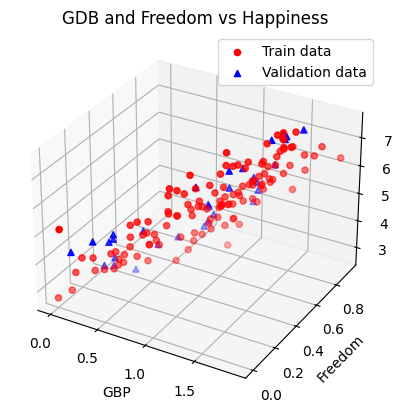

the learnt model (tool): f(x) =  3.2007585989248835  +  -68616.18596733066  * x1 +  137236.67264356057  * x2
Prediction error (tool):  0.4142102429519938
the learnt model (manual): f(x) =  3.2007686662429786  +  295.2972665329762  * x1 +  -586.9324953431787  * x2
Prediction error:  0.6522204049697674


In [35]:
filePath1 = "data/v1_world-happiness-report-2017.csv"
filePath2 = "data/v2_world-happiness-report-2017.csv"
filePath3 = "data/v3_world-happiness-report-2017.csv"

inputs, outputs = loadData(filePath2, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

train_inputs, train_output, validation_inputs, validation_output = generateTrainingTest(inputs, outputs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_inputs[0], train_inputs[1], train_output, c='r', marker='o', label='Train data')
ax.scatter(validation_inputs[0], validation_inputs[1], validation_output, c='b', marker='^', label='Validation data')
ax.set_xlabel("GBP")
ax.set_ylabel("Freedom")
ax.set_zlabel("Happiness")
plt.legend()
plt.title("GDB and Freedom vs Happiness")
plt.show()

linear_regression_tool(train_inputs, train_output, validation_inputs, validation_output)

linear_regression_manual(train_inputs, train_output, validation_inputs, validation_output)